In [1]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup

In [2]:
#Entered the url of machine learning jobs 
PageUrl = "https://in.indeed.com/jobs?q=machine+learning+engineer&l=India&start={}"

In [3]:
Driver = webdriver.Chrome("C:\chromedriver_win32\chromedriver.exe")

In [4]:
## Data we want to collect (Store)
Titles = []
Locations = []
Companies = []
Salaries = []
JobDetails = []

In [5]:
for pageNum in range(0, 200, 10):
    Driver.get(PageUrl.format(pageNum))
    cards = None
    while True:
        cards = Driver.find_elements_by_class_name("result")
        break
        
    for card in cards:
        details = BeautifulSoup(card.get_attribute('innerHTML'), 'html.parser')
        
        try:
            title = details.find('a', class_ = "jobtitle").text.replace("\n", "").strip()
            Titles.append(title)
        except:
            Titles.append(None)
            
            
        try:
            location = details.find(class_ = "location").text.replace("\n", "").strip()
            Locations.append(location)
        except:
            Locations.append(None)
            
        try:
            company = details.find(class_ = "company").text.replace("\n", "").strip()
            Companies.append(company)
        except:
            Companies.append(None)
            
        
        try:
            salary = details.find(class_ = "salary").text.replace("\n", "").strip()
            Salaries.append(salary)
        except:
            Salaries.append(None)
        
        while True:
            try:
                card.click()
                sleep(1)
                try:
                    Des = Driver.find_element_by_id("vjs-tab-job")
                    DesHTML = BeautifulSoup(Des.get_attribute('innerHTML'), 'html.parser')
                    all_li = DesHTML.find_all("li")
                    all_li_text = ""
                    for Li in all_li:
                        all_li_text += Li.text.replace("\n", "")
                        all_li_text += " "
                    JobDetails.append(all_li_text)
                except:
                    JobDetails.append(None)
                break
            except:
                pass
        
                

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({
    "Title":Titles,
    "Location":Locations,
    "Company":Companies,
    "Salary":Salaries,
    "Details":JobDetails
    
})

In [8]:
df.to_csv("machinelearning.csv")

# Data Analysis Part Start

In [9]:
#prints the first 5 rows of a DataFrame
df.head()

,Title,Location,Company,Salary,Details
0,Engineer - Machine Learning,"Pune, Maharashtra",Maersk,None,As the leading ocean transportation carrier in...
1,Machine Learning Engineer,"Indore, Madhya Pradesh",Quasesoft Technologies (HBH Group),None,Day shift total work: 1 year (Required) Bachel...
2,Trainer/ Faculty Member- Machine Learning,"Andheri, Mumbai, Maharashtra",Itvedant,"₹35,000 - ₹45,000 a month",itvedant was started with the aim of bridging ...
3,Machine Learning Engineer - Computer Vision/NLP,"Pune, Maharashtra",Scandid,None,5+ years of experience in building production-...
4,Machine Learning Engineer,"Pune, Maharashtra",Shivrai Technologies Pvt. Ltd,None,Designing and developing machine learning and ...


In [10]:
# Looking at the information about the dataset, datatypes of the coresponding columns and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     105 non-null    object
 1   Location  105 non-null    object
 2   Company   105 non-null    object
 3   Salary    23 non-null     object
 4   Details   81 non-null     object
dtypes: object(5)
memory usage: 4.2+ KB


In [11]:
#Print the duplicated rows
df[df.duplicated()]

,Title,Location,Company,Salary,Details
17,Machine Learning Engineer,"Mumbai, Maharashtra",Rainbox Media Private Limited,None,"Creating supervised, neural network based and ..."
21,Machine Learning Engineer,"Bengaluru, Karnataka",Provonsys Technologies,"₹6,00,000 - ₹15,00,000 a year",Morning shift Temporarily due to COVID-19 Remo...
31,Jr Machine Learning Engineer,"Bengaluru, Karnataka",Radome Technologies & Services Pvt Ltd,"₹2,00,000 a year",Monday to Friday total work: 1 year (Preferred...
33,Machine Learning Engineer,"Pune, Maharashtra",Climate Connect,None,Developing and testing electricity and carbon ...
35,Machine Learning Engineer/ Data Scientist,"Noida, Uttar Pradesh",Dürr AG,None,"Validate requirements, execute projects and en..."
39,Machine Learning Engineer,Karnataka,Branch International,None,You excel at software engineering and programm...
42,Data Engineer,"Panaji Secretariat, Goa",Numadic,"₹40,000 a month",Apply advanced predictive modeling and statist...
47,Machine Learning Engineer,"Delhi, Delhi",CCS Computers,None,3+ years of industry experience developing mac...
48,Machine Learning Engineer,"Bengaluru, Karnataka",Provonsys Technologies,"₹6,00,000 - ₹15,00,000 a year",Morning shift Temporarily due to COVID-19 Remo...
51,Machine Learning Engineer,"Chennai, Tamil Nadu",PayPal,None,Exciting Role to be part of Paypal Privacy tea...


In [12]:
#Droping duplicates
df=df.drop_duplicates(subset=["Title","Location","Company","Salary","Details"],keep="first")

In [13]:
#NO Duplicate values in any rows 
df[df.duplicated()]

,Title,Location,Company,Salary,Details


In [14]:
## Companies who have max jobs for Machine Learning..
CompanyGroup = df.groupby("Company").count()["Title"].sort_values(ascending = False)[:5]

In [15]:
CompanyGroup

Company
Dream Sports                   2
Dürr AG                        2
Perfect Intelligent Systems    2
Twitter                        2
AlphaSense                     2
Name: Title, dtype: int64

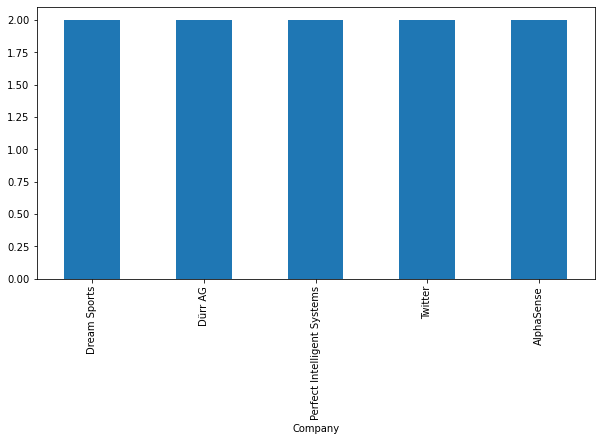

In [16]:
CompanyGroup.plot(kind = "bar", figsize = (10, 5))

In [17]:
## Cities who have max jobs for Machine Learning..
LocationGroup = df.groupby("Location").count()["Title"].sort_values(ascending = False)[:5]

In [18]:
LocationGroup

Location
Bengaluru, Karnataka    26
Pune, Maharashtra       16
Mumbai, Maharashtra      6
Delhi, Delhi             4
Gurgaon, Haryana         4
Name: Title, dtype: int64

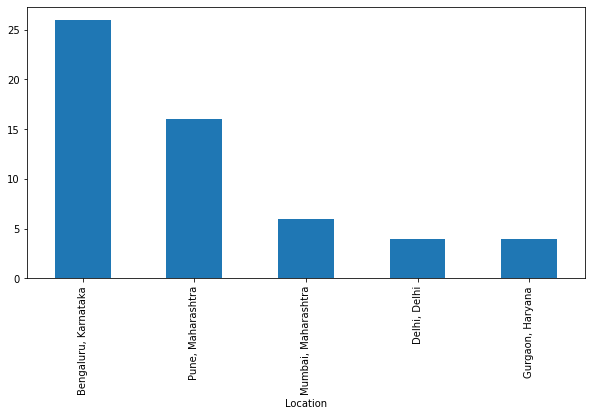

In [19]:
LocationGroup.plot(kind = "bar", figsize = (10, 5))